# Clasificación

En este caso, se estará trabajando con información sobre cancer de mama. A través del archivo "breast-cancer-wisconsin.data" se desea poder crear un modelo capaz de indentificar si un tumor es benigno o maligno.

Auotores: Stefano Aragoni, Carol Arevalo

1. Número de código de la muestra: número de identificación
2. Grosor de los grumos: 1 - 10
3. Uniformidad del tamaño de las células: 1 - 10
4. Uniformidad de la forma celular: 1 - 10
5. Adhesión marginal: 1 - 10
6. Tamaño de una sola célula epitelial: 1 - 10
7. Núcleos desnudos: 1 - 10
8. Cromatina Blanda: 1 - 10
9. Núcleos normales: 1 - 10
10. Mitosis: 1 - 10
11. Clase: (2 para benigno, 4 para maligno)

_______________________
## Parte 1
### 1.1. Haga   una   exploración   rápida   de   sus   datos   para   eso   haga   un   resumen   de   su dataset.

#### Importar Librerías
Como primer paso, se importaron las siguientes librerías que permiten poder llevar a cabo el análisis respectivo.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from quickda.explore_data import *
import datetime
from pandas_profiling import ProfileReport
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
%matplotlib inline

#### Datos
Se cargan los datos a través de Pandas. Ya que el archivo original no cuenta con nombres de columnas, se le agregó dicha información manualmente.

In [60]:
# Convertimos data a csv
datos = pd.read_csv('breast-cancer-wisconsin.data', header=None)

# Se le asigna un nombre a cada columna
datos.columns = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

A continuación se presentan los primeros 5 y los últimos 5 datos. En este caso, como se puede observar a conmtinuación, todos los valores son númericos. Es decir que posiblemente no se requerirá crear nuevas variables dummy.

In [4]:
datos.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
datos.tail()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


#### Análisis Exploratorio de Datos (EDA)

A continuación se realizó un análisis exploratorio inicial para entender más a profundidad los datos; incluyendo los tipos de datos y qué significan los mismos. Por otro lado, también se quería encontrar datos faltantes, datos nulos, entre otros. 


A la hora de revisar el documento de los datos, fuera del entorno de python, se pudo detectar que habían ciertos valores con el valor "?". Por tal razón, como primer paso se cambió dicho valor por otro nulo, para poder indentificar las filas específicas y poder remplazar dichos valores posteriormente.

In [6]:
#para todos los ? los cambiamos por NaN
datos.replace('?', np.nan, inplace=True)

datos.isnull()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


En este caso, como se puede observar, contamos con algunos datos faltantes identificados en el heatmap con amarillo; más específicamente se puede observar que hay algunos datos nulos en la columna de Núcleos desnudos. Ya que son pocos datos, se estará corrigiendo esta situación en el proceso de limpieza de datos.

<AxesSubplot: >

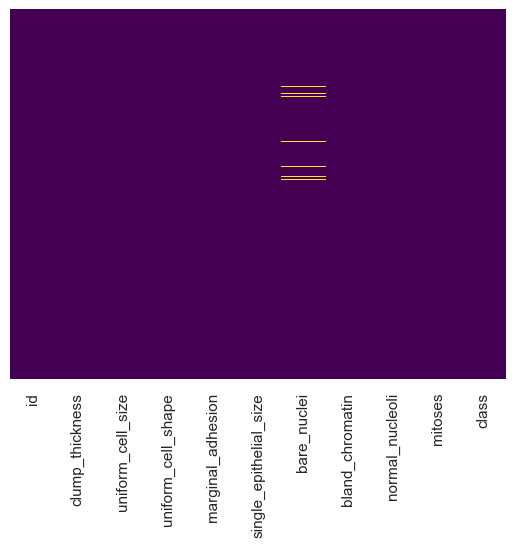

In [7]:
sns.heatmap(datos.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

A continuación se presenta el resumen de las columnas del dataset. Se presenta información sobre la cantidad de entradas (no vacías) relacionadas a cada columna, así como el tipo de información que almacena.

En este caso, la columna de bare_nuclei regresa que es de tipo objeto debido a que tiene varios valores NaN. Por ende, no todos los datos son númericos. Esto será limpiado en la sección de limpieza del dataset.

In [8]:
# Obtener información general sobre el conjunto de data
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             683 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


Asimismo, a continuación se presenta un resumen estadístico de las columnas numéricas, que incluye promedio, desviación estándar, y otros datos.

Observando rápidamente la información de las columnas, podemos observar que la mayoría de datos son representativos de tumores benignos (indicados por el valor 2).

In [9]:
# Obtener un resumen estadístico de las columnas numéricas
print(datos.describe())

                 id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
count  6.990000e+02       699.000000         699.000000          699.000000   
mean   1.071704e+06         4.417740           3.134478            3.207439   
std    6.170957e+05         2.815741           3.051459            2.971913   
min    6.163400e+04         1.000000           1.000000            1.000000   
25%    8.706885e+05         2.000000           1.000000            1.000000   
50%    1.171710e+06         4.000000           1.000000            1.000000   
75%    1.238298e+06         6.000000           5.000000            5.000000   
max    1.345435e+07        10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min         

------------------
### 1.2. Diga   el   tipo   de   cada   una   de   las   variables   del   dataset   (cualitativa   o   categórica, cuantitativa continua, cuantitativa discreta)

1. Número de código de la muestra ------------- Categórico
2. Grosor de los grumos ------------- Cuantitativa Discreta
3. Uniformidad del tamaño de las células ------------- Cuantitativa Discreta
4. Uniformidad de la forma celular ------------- Cuantitativa Discreta
5. Adhesión marginal ------------- Cuantitativa Discreta
6. Tamaño de una sola célula epitelial ------------- Cuantitativa Discreta
7. Núcleos desnudos ------------- Cuantitativa Discreta
8. Cromatina Blanda ------------- Cuantitativa Discreta
9. Núcleos normales ------------- Cuantitativa Discreta
10. Mitosis ------------- Cuantitativa Discreta
11. Clase ------------- Categórico

A pesar de que todas las columnas almacenan valores numéricos, no todas las variables son cuantitativas. Por ejemplo, el código de la muestra hace referencia a un identificador; por otro lado, la variable clase usa 2 para representar benigno y 4 para maligno (es una variable ya convertida a dummy).

--------------

### 1.3. Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando.

#### Limpieza Inicial
En este caso, el dataset contaba con varios errores de formato; incluyendo el '?' ubicado en algunas columnas. Por tal razón, antes de hacer los gráficos exploratorios, se realizó una limpieza inicial con el propósito de poder tener más control sobre los datos.

Más específicamente, se borraron estos datos (que son menos al 5% de los datos del dataset) temporalmente. Sin embargo, posteriormente se remplazará estos valores vacíos por el promedio de la variable.

In [61]:
# Limpieza inicial
# eliminar columnas con valores Nan
datos.dropna(inplace=True)


#### Gráficos Exploratorios
Como primer paso de los gráficos exploratorios, se ejcutó el comando de eda_num de QuickDa para poder obtener gráficas de diferentes columnas. Esto a través de obtener histogramas, así como diagramas de caja y bigotes. A continuación se presenta los resultados.

Las siguientes gráficas indican la distribución de los datos así como la cantidad de ciertos datos de cada variable. En el caso de casi todas las gráficas generadas, se puede observar como la mayoría de datos se ubican entre un rango de 1 a 4. Existen unos puntos atípicos, como en el caso de marginal adhesion, single epithelial size, normal nucleoli y bland chromatin, ubicados en el extremo opuesto (en el rango de 8 a 10).

Esto posiblemente se debe a que la mayoría de muestras son libres de cancer y podrían tener indicadores bajos. Sin embargo, las muestras que sí tienen tumores malignos avanzados representan una minoría entre los datos y, por ende, los datos dichos parecen ser atípicos. 

Posteriormente se analizará la relación entre dichas variables y el tipo de tumor.

Outlier Analysis - Boxplot


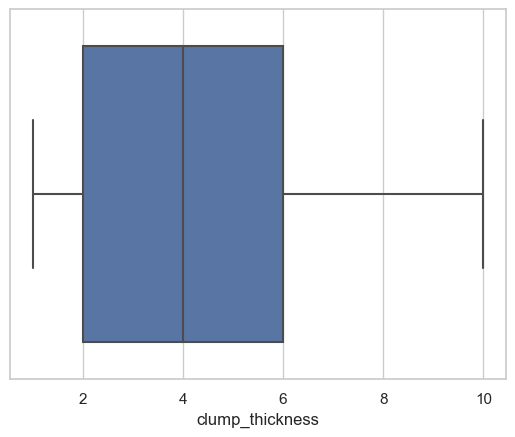

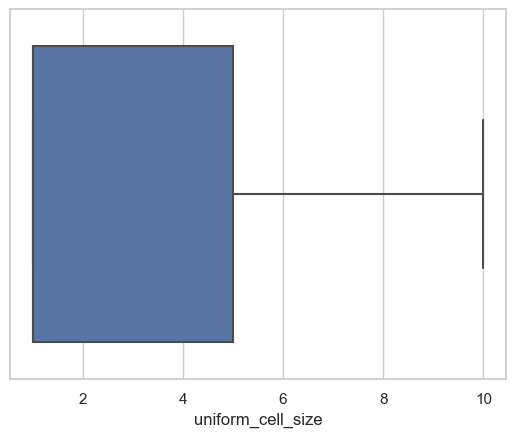

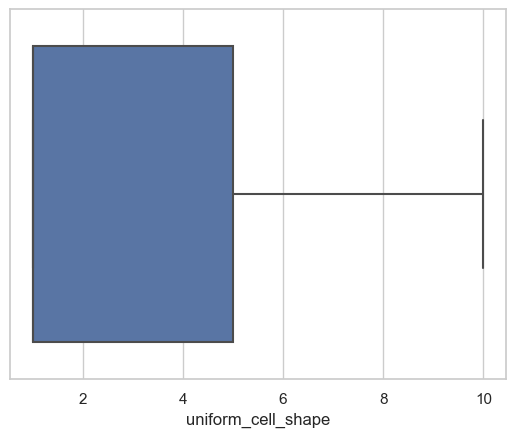

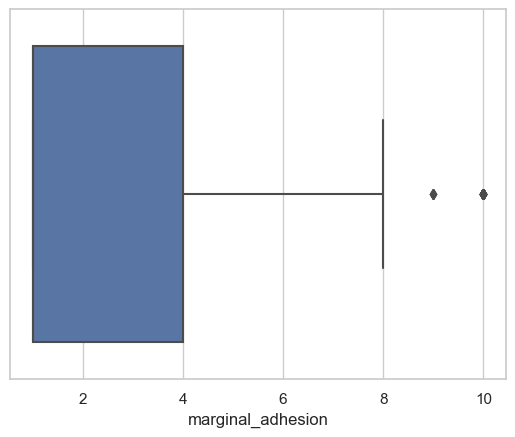

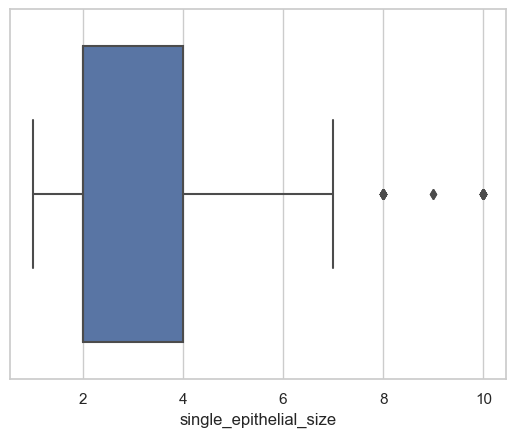

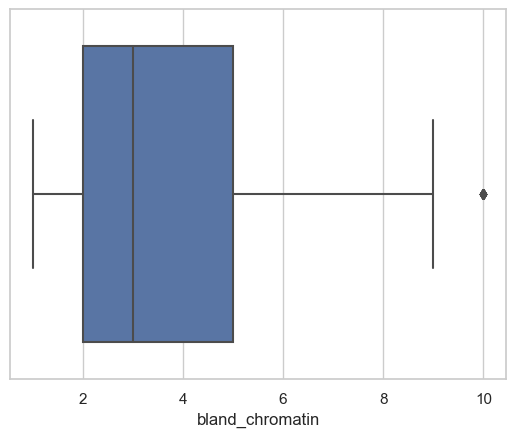

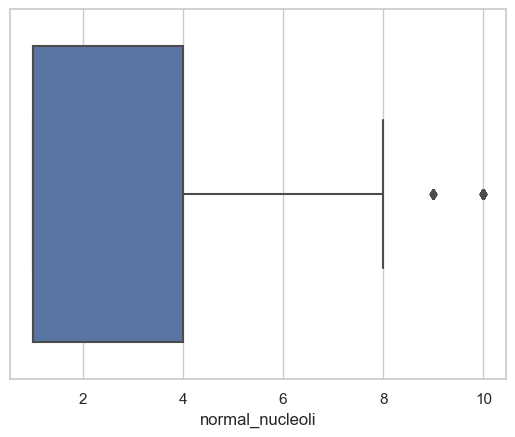

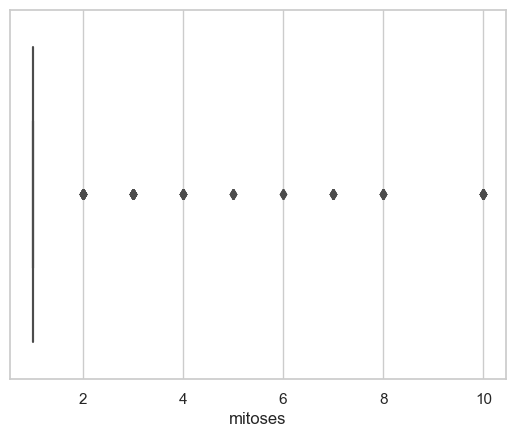

Distribution Analysis - Histogram


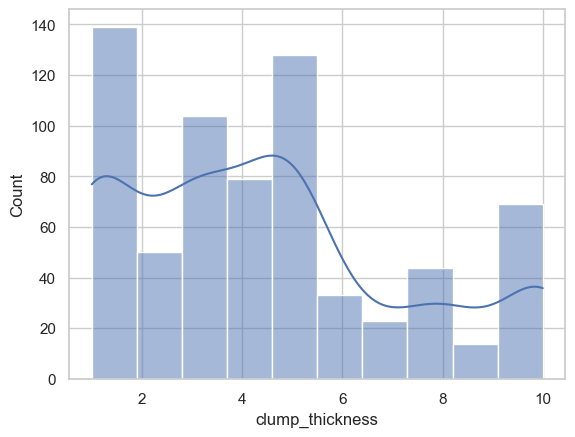

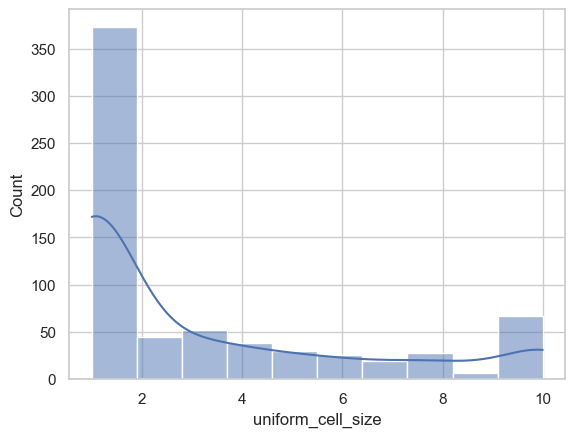

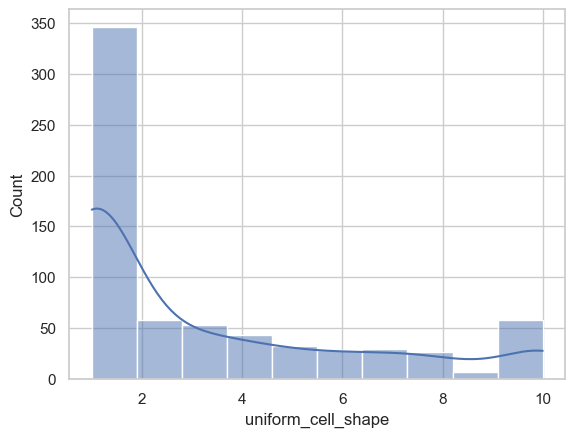

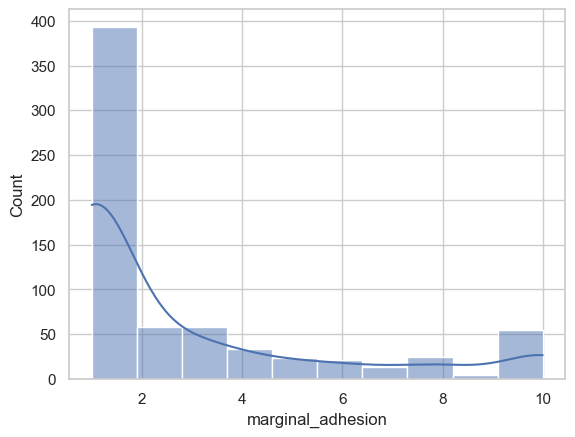

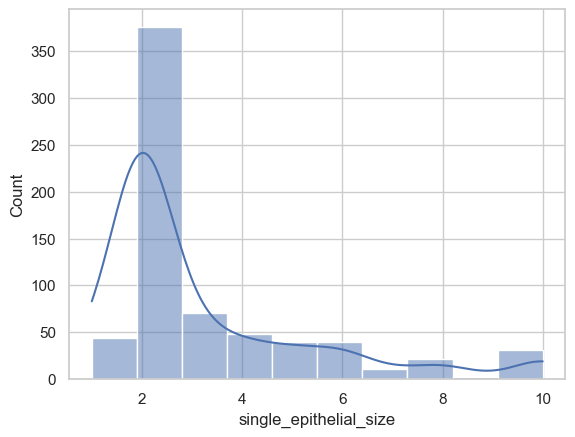

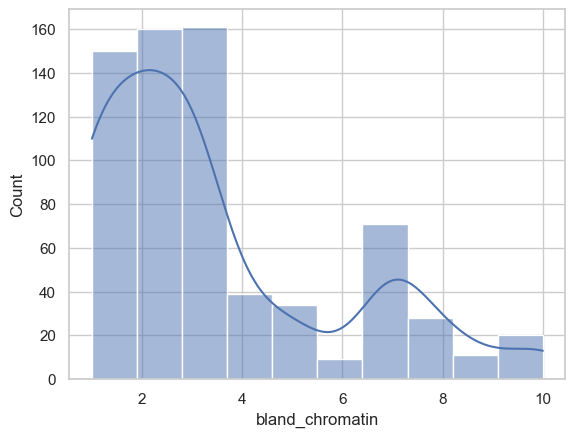

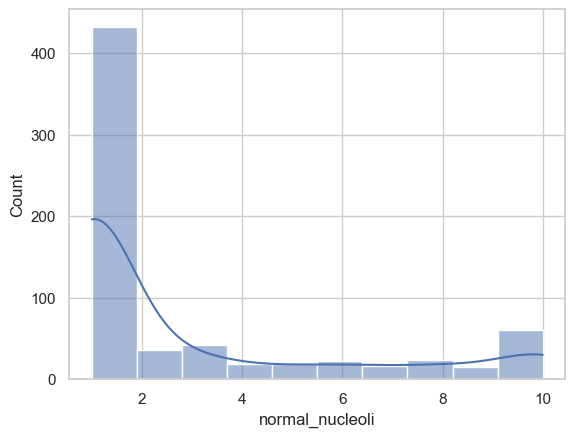

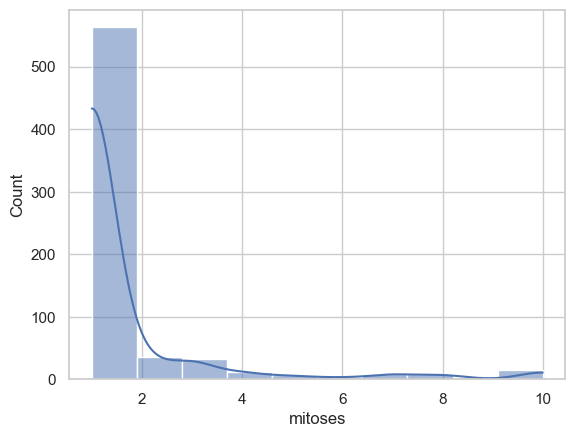

In [45]:
from copy import deepcopy
dataTemp = deepcopy(datos)

columns = ['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']
dataTemp = dataTemp[columns]

eda_num(dataTemp)

Antes de analizar el tipo de tumor con las otras variables, primero se quizo observar la distribución entre los tumores benignos (2) y malignos (4). En este caso, como se puede ver a continuación, aproximadamente casi 70% de los datos pertenecen a tumores benignos; mientras que el resto a tumores malignos.

<AxesSubplot: xlabel='class', ylabel='count'>

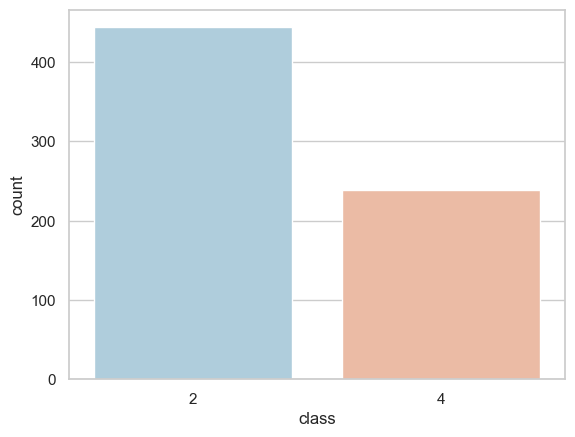

In [11]:
sns.set_style('whitegrid')
sns.countplot(x = 'class', data = datos, palette = 'RdBu_r')

La primera comparación que se quizo hacer fue entre tipo de tumor y clump_thickness. En este caso, se puede observar que la mayoría de tumores benignos tienen valores muy bajos de clump thickness. Sin embargo, en el caso de los tumores malignos, la mayoría cuenta con más clump thickness en las muestras. 

<AxesSubplot: xlabel='class', ylabel='count'>

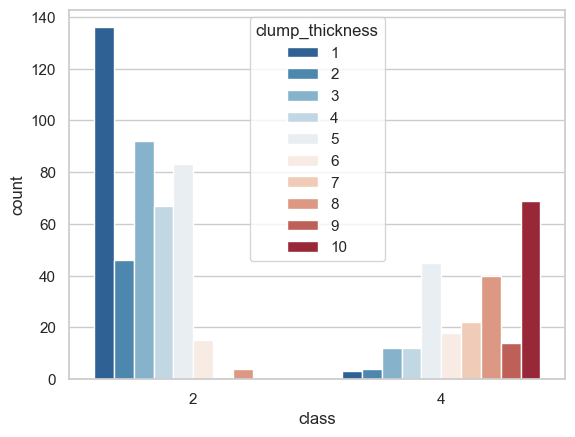

In [12]:
sns.set_style('whitegrid')
sns.countplot(x = 'class', hue = 'clump_thickness', data = datos, palette = 'RdBu_r')

Por otro lado, también se analizó la uniformidad de las celulas con el tipo de tumor. Nuevamente, los tumores benignos tienen un menor indicador de variación entre uniformidad de tamaños de células. Sin embargo, los tumores malignos indican que mientras más sea la variación, más probabilidad que sea un tumor maligno.

<AxesSubplot: xlabel='class', ylabel='count'>

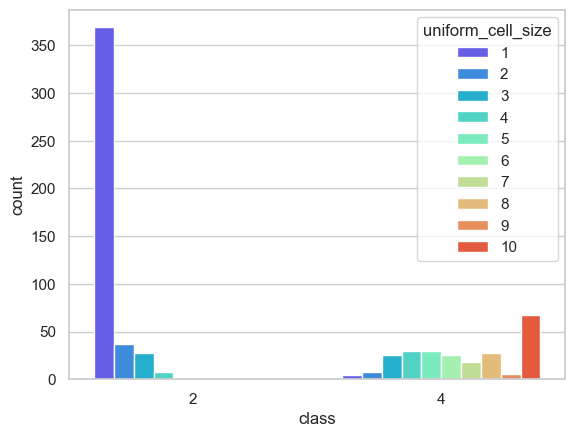

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'class', hue = 'uniform_cell_size', data = datos, palette = 'rainbow')

Similarmente a uniform cell shape, podemos observar que mientras más bajo sea el indicador de uniform cell shape, más probabilidad hay que sea benigno el tumor. Mientras que mientras más alto sea el indicador, más probabilidad hay que sea maligno.

<AxesSubplot: xlabel='class', ylabel='count'>

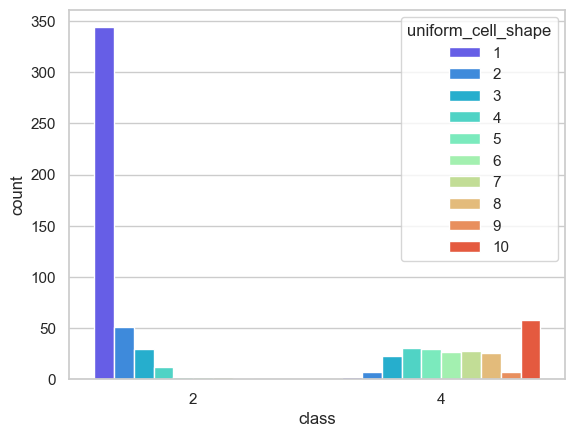

In [52]:
sns.set_style('whitegrid')
sns.countplot(x = 'class', hue = 'uniform_cell_shape', data = datos, palette = 'rainbow')

Otro aspecto que se quizo comparar era tipo de tumor con marginal adhesion. En este caso se pudo observar nuevamente el mismo patrón; mientras más bajo el indicador de marginal adhesion, más probable que sea benigno. 

<AxesSubplot: xlabel='class', ylabel='count'>

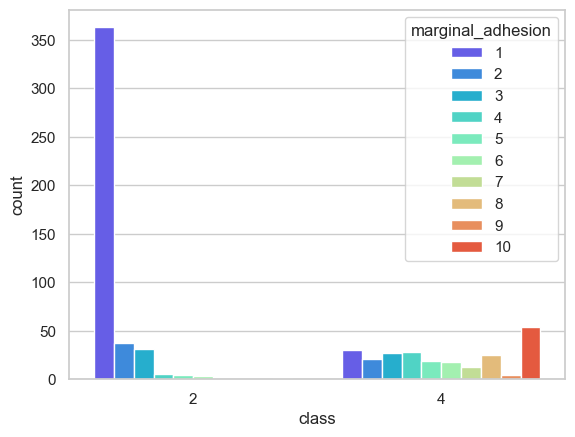

In [50]:
sns.set_style('whitegrid')
sns.countplot(x = 'class', hue = 'marginal_adhesion', data = datos, palette = 'rainbow')

Similarmente, al comparar normal nuecleoli con tipo de tumor se volvieron a obtener los mismos resultados. En este punto, se puede asumir que este es un patrón con todas las respectivas variables.

<AxesSubplot: xlabel='class', ylabel='count'>

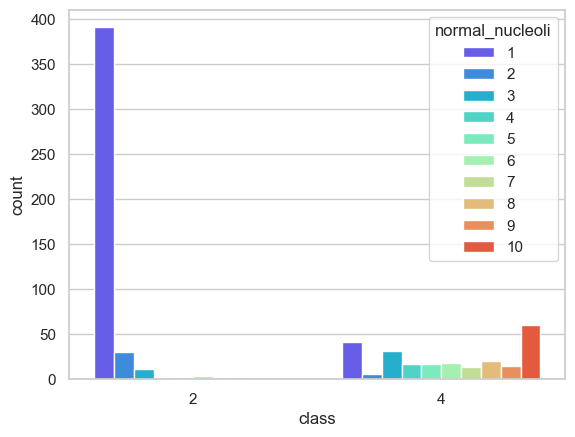

In [51]:
sns.set_style('whitegrid')
sns.countplot(x = 'class', hue = 'normal_nucleoli', data = datos, palette = 'rainbow')

Para contrastar, también se quizo determinar la distribución de otras variables. En el caso de normal nucleoli, se puede observar que la mayoría de datos tienen un bajo indicador de variación, lo cual podría corresponder a tumores benignos. Sin embargo, también se cuenta con otros valores con un indicador 10 de variación, los cuales podrían indicar la presencia de tumores malignos.

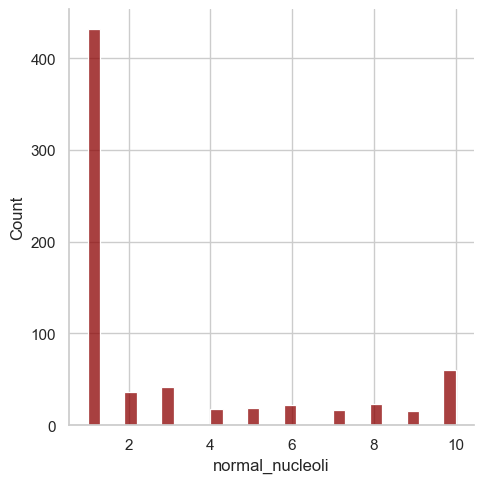

In [14]:
sns.displot(datos['normal_nucleoli'].dropna(), color = 'darkred', bins = 30)

Al revisar la variable de uniform cell shape, se pudo determinar la misma distribución de los datos. Nuevamente, se tiene la mayoría de datos con el menor indicador posible, mientras que existen unos pocos valores con un indicador máximo de variación 10. 

<AxesSubplot: xlabel='uniform_cell_shape', ylabel='count'>

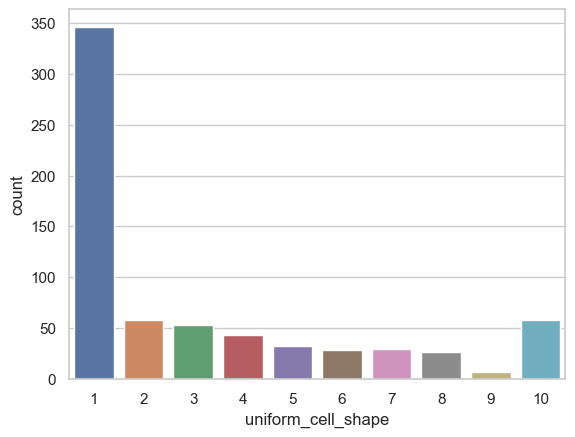

In [16]:
sns.countplot(x = 'uniform_cell_shape', data = datos)

Por otro lado, se quería determinar si existía alguna relación entre uniform cell shape y cell size. En este caso, se pudo observar cómo las variables coincidían en ciertos aspectos. Mientras más variación haya en el tamaño de la celula, más variación tendrá en su forma también; el opuesto también es válido. 

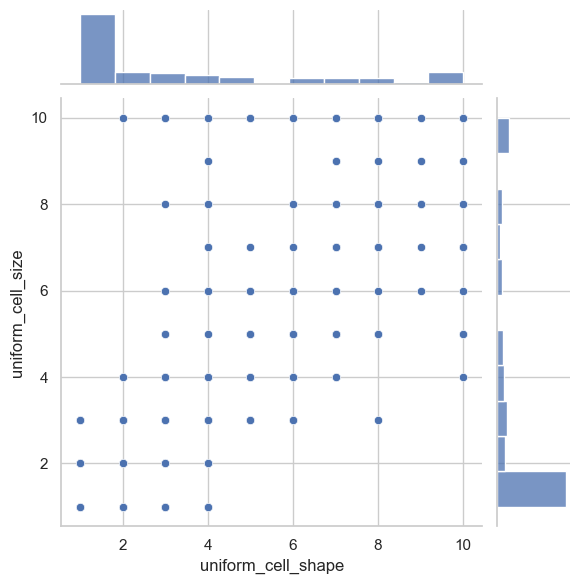

In [17]:

sns.jointplot(x = 'uniform_cell_shape', y = 'uniform_cell_size', data = datos)


__________
### 1.4. Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.
En este caso, las variables categóricas son el class (tipo de tumor) y el ID de la muestra respectiva. Por tal razón, se separaron estas variables del dataset y se realizó una matriz de correlación para poder determinar el grado de correlación entre las mismas.

Como se puede observar en el mapa de correlación, la mayoría de variables están relacionadas entre sí. La mayoría de variables tienen una correlación de 0.5 y superior. Esto a excepción de la variable de mitosis, la cual tiene un grado de correlación promedio de 0.4 con las otras variables. Las variables cuantitativas que mayor relación tienen son uniform cell size y uniform cell shape. Asimismo, estas dos variables tienen la mayor cantidad de coorelación con otras variables, como normal nucleoli y bland chromatin.

/var/folders/wq/gs7vpwkj7k31lw9njy09srjw0000gn/T/ipykernel_30713/155514855.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



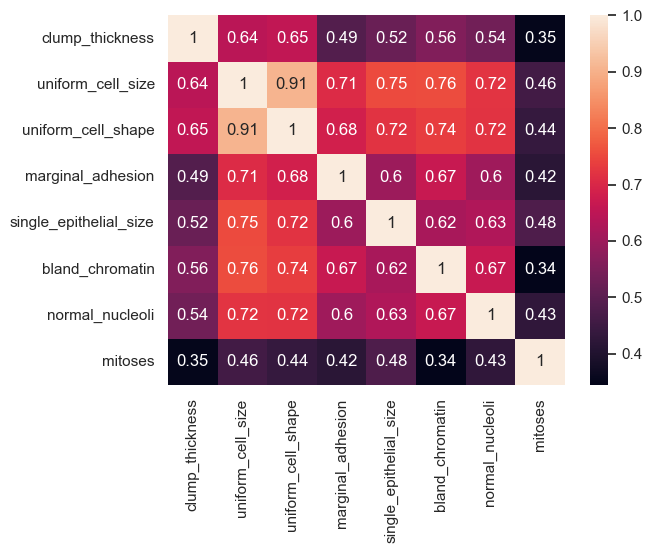

In [63]:
# separar las variables numéricas y categóricas
num_vars = datos[['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']]

# matriz de correlación númericas
sns.heatmap(num_vars.corr(), annot=True)
plt.show()

A través de la función corr() también se puede determinar cuáles variables y a qué grado se relacionan las mismas con una variable específica. En este caso, las variables que más afectan el tipo de tumor son uniform cell shape y cell size. Las otras variables tienen una relación entre 0.68 a 0.75; a excepción de mitosis que tienen la menor relación con 0.42.

In [65]:
num_vars_corr = datos[['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']]

#quickda which columns affect attendance
a = num_vars_corr.corr()['class'].sort_values(ascending=False) 
print("\nVariables que afectan el tipo de tumor:")
print(a)


Variables que afectan el tipo de tumor:
class                     1.000000
uniform_cell_shape        0.818934
uniform_cell_size         0.817904
bland_chromatin           0.756616
clump_thickness           0.716001
normal_nucleoli           0.712244
marginal_adhesion         0.696800
single_epithelial_size    0.682785
mitoses                   0.423170
Name: class, dtype: float64


/var/folders/wq/gs7vpwkj7k31lw9njy09srjw0000gn/T/ipykernel_30713/4040804703.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



_____________
### 1.5. Utilice   las  variables   categóricas,   haga   tablas  de   frecuencia,   proporción,   gráficas de barras o cualquier otra técnica que le permita explorar los datos
En este caso, las únicas variables categóricas son el ID de la muestra y Class (tipo de tumor). Sin embargo, la variable de ID es irrelevante para este estudio, ya que no presenta ninguna información relevante. Por tal razón, solo se estará analizando la variable de class.

A continuación se presenta la tabla de frecuencia correspondiente, en la cual se puede observar cómo los tumores benignos representan 458 de 699 datos; esto siendo la mayoría.

In [69]:
categoricas = ['class']

# tablas de frecuencia variables categoricas
for col in categoricas:
    print("\n****************************\n",col,"\tFrecuencia","\n****************************")
    print(datos[col].value_counts())
    print("\n donde 2 es benigno y 4 es maligno")


****************************
 class 	Frecuencia 
****************************
2    458
4    241
Name: class, dtype: int64

 donde 2 es benigno y 4 es maligno


En caso de analizar los datos en formato de proporción, podemos observar que los tumores benignos representan un 65.52% de los datos, mientras que los malignos representan un 34.47%.

In [70]:
#tabla de proporciones
for col in categoricas:
    print("\n****************************\n",col,"\tProporción","\n****************************")
    print(datos[col].value_counts(normalize=True))


****************************
 class 	Proporción 
****************************
2    0.655222
4    0.344778
Name: class, dtype: float64


Esta misma información se puede representar a través de una gráfica de barras. A través de esta se puede observar visualmente la relación y proporción de las mismas variables.

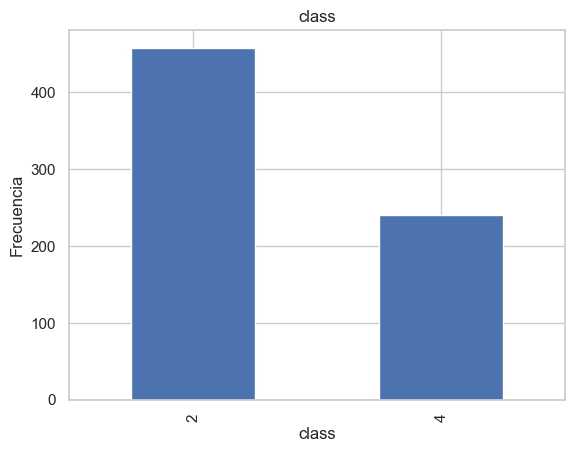

In [75]:
#grafica de barras with name of the columns and axis
for col in categoricas:
    plt.figure()
    datos[col].value_counts().plot(kind='bar', title=col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


___
### 1.6. Realice la limpieza de variables utilizando las técnicas vistas en clase, u otras que piense pueden ser de utilidad

A través del análisis exploratorio se pudo determinar que existen varios puntos en la columa de Núcleos Desnudos donde existen valores faltantes representados por '?'. En este punto, deseamos dar valores a los datos faltantes en vez de solo eliminar las filas que no tengan ese valor.  Una forma de hacerlo es usando el numero promedio de núcleos desnudos. 


In [76]:
# Convertimos data a csv
datos = pd.read_csv('breast-cancer-wisconsin.data', header=None)

# Se le asigna un nombre a cada columna
datos.columns = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

def impute_bare_nuclei(cols):
    bare_nuclei = cols[0]
    if pd.isnull(bare_nuclei):
        datos['bare_nuclei'] = datos['bare_nuclei'].astype(float)
        return datos['bare_nuclei'].mean()
    else:
        return bare_nuclei



Se aplica la función para llegar dichos espacios vacíos con el promedio de la columna.

In [19]:
datos['bare_nuclei'] = datos[['bare_nuclei']].apply(impute_bare_nuclei, axis = 1)

Se puede ver el nuevo mapa de color sin datos nulos; esto representando que se pudo remplazar los valores faltantes con este promedio.


<AxesSubplot: >

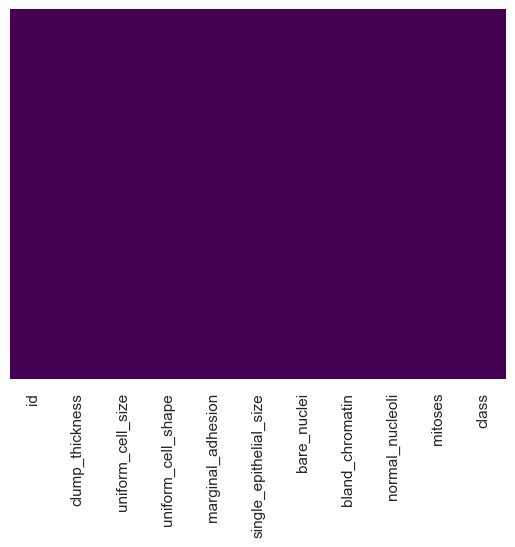

In [20]:
sns.heatmap(datos.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

--------------
## Parte 2

### 2.1. Pruebe los modelos de Regresión Logística y el de K-NN

#### Regresión Logística

Iniciemos con dividir nuestros datos en un cojunto para entrenar (training) y otro para probar (test).

##### Partir en Train / Test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(datos.drop('class' , axis = 1), 
                                                    datos['class'], test_size = 0.30, 
                                                    random_state = 101)

                

## Entrenamiento y Predicción

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
modeloLog = LogisticRegression(max_iter = 500)
modeloLog.fit(X_entreno,y_entreno)

LogisticRegression(max_iter=500)

In [25]:
predicciones = modeloLog.predict(X_prueba)

## Evaluación

Podemos chequear:  precision, recall y f1-score utilizando **classification report**!

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_prueba, predicciones))

              precision    recall  f1-score   support

           2       0.63      1.00      0.78       130
           4       0.00      0.00      0.00        75

    accuracy                           0.63       205
   macro avg       0.32      0.50      0.39       205
weighted avg       0.40      0.63      0.49       205



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



No está mal!  Puede que desee explorar otras formas de organizar los datos (feature engineering), algunas sugerencias de trabajar los datos:

* Intente extraer el título (Dr., Mr., Mrs, etc.) de el nombre, y dejarlo como otra columna
* Quizás la letra de la Cabina podría ser una variable importante
* ¿Hay alguna información de el **ticket** que podría ser útil?

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
confusion_matrix(y_prueba,predicciones)

array([[130,   0],
       [ 75,   0]])

In [30]:
accuracy_score(y_prueba, predicciones)

0.6341463414634146

## Utilización del KNN


In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [33]:
knn.fit(X_entreno, y_entreno)

KNeighborsClassifier(n_neighbors=1)

In [34]:
pred = knn.predict(X_prueba)

## Predicciones y Evaluaciones

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(confusion_matrix(y_prueba, pred))

[[97 33]
 [44 31]]


## Selección de un valor K

Utilizaremos el método del codo (elbow method) para seleccionar un buen valor para K:

In [37]:
tasa_error = []

# Puede tardar un poco
for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_entreno, y_entreno)
    pred_i = knn.predict(X_prueba)
    tasa_error.append(np.mean(pred_i != y_prueba))

Text(0, 0.5, 'Tasa de Error')

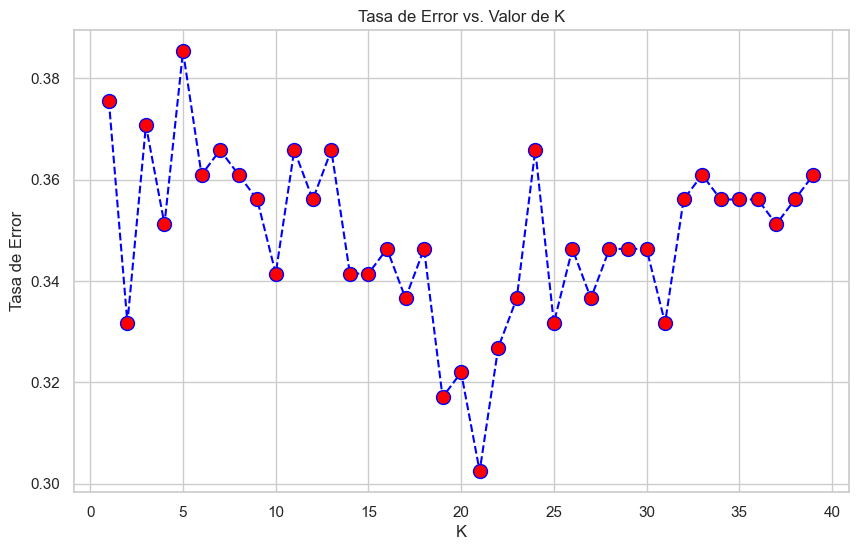

In [38]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), tasa_error, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

In [39]:
# PRIMERO UNA RAPIDA COMPARACION CON NUESTRO VALOR ORIGINAL K=9
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_entreno,y_entreno)
pred = knn.predict(X_prueba)

print('CON K = 9')
print()
print('Matriz de Confusión\n')
print(confusion_matrix(y_prueba,pred))
print('\n')
print(classification_report(y_prueba,pred))

CON K = 9

Matriz de Confusión

[[119  11]
 [ 62  13]]


              precision    recall  f1-score   support

           2       0.66      0.92      0.77       130
           4       0.54      0.17      0.26        75

    accuracy                           0.64       205
   macro avg       0.60      0.54      0.51       205
weighted avg       0.62      0.64      0.58       205



In [40]:
# AHORA CON K = 18
knn = KNeighborsClassifier(n_neighbors = 18)

knn.fit(X_entreno, y_entreno)
pred = knn.predict(X_prueba)

print('CON K = 18')
print()
print('Matriz de Confusión\n')
print(confusion_matrix(y_prueba,pred))
print('\n')
print(classification_report(y_prueba,pred))

CON K = 18

Matriz de Confusión

[[123   7]
 [ 64  11]]


              precision    recall  f1-score   support

           2       0.66      0.95      0.78       130
           4       0.61      0.15      0.24        75

    accuracy                           0.65       205
   macro avg       0.63      0.55      0.51       205
weighted avg       0.64      0.65      0.58       205

